In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x = [1, 2.2, 3.5, 4.2, 4.9]
y = [2, 2.5, 2.9, 3.6, 4.1]

x_vel = [x[i] - x[i-1] for i in range(1, len(x))]
y_vel = [y[i] - y[i-1] for i in range(1, len(y))]

In [32]:
def plot_traj_base():
    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.xlim(0, 10)
    plt.ylim(0, 8)
    plt.grid(alpha=0.5)
    #plt.show()

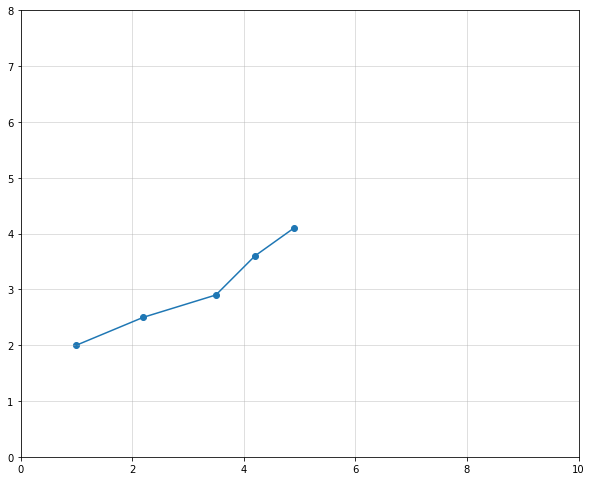

In [33]:
plot_traj_base()

plt.plot(x, y)
plt.scatter(x, y)
plt.show()

In [38]:
x_pred = [x[-1] + np.mean(x_vel)*i for i in range(len(x))]
y_pred = [y[-1] + np.mean(y_vel)*i for i in range(len(x))]

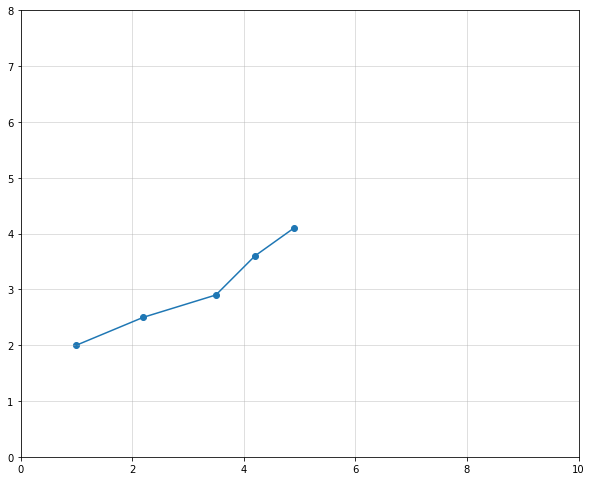

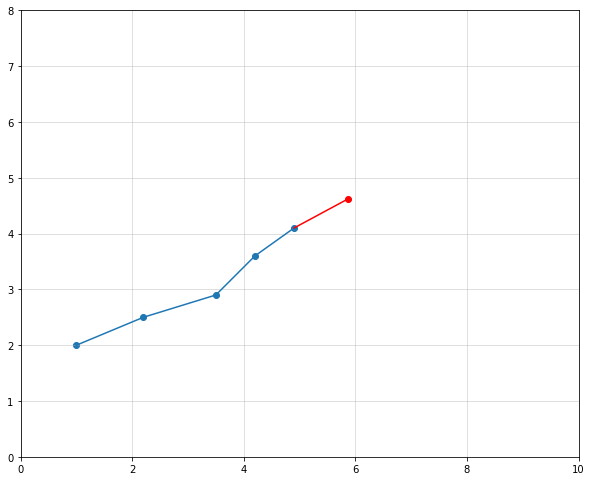

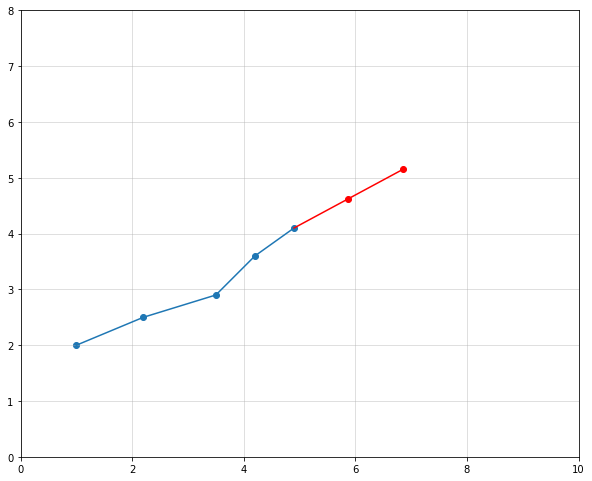

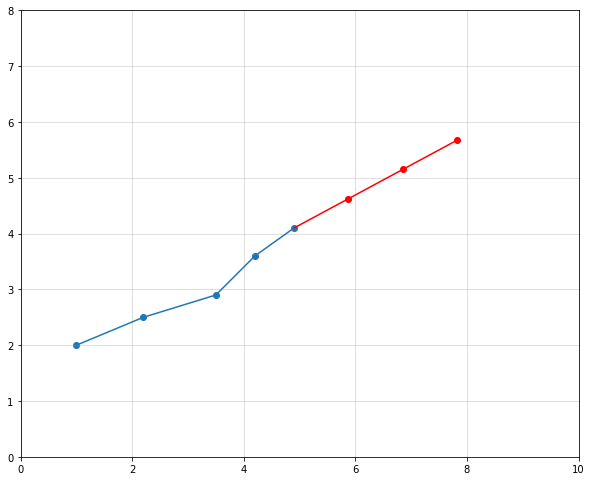

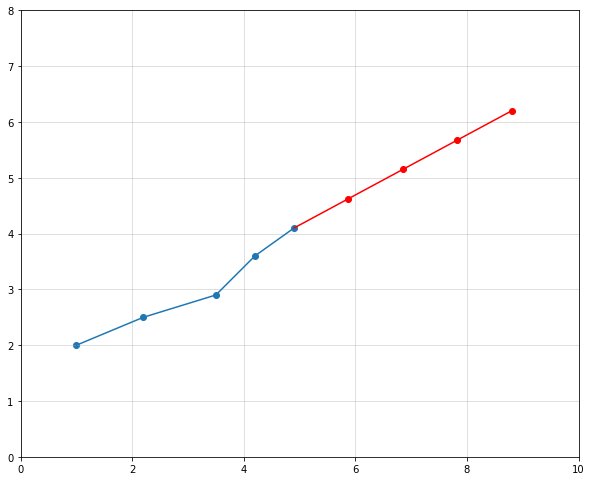

In [39]:
for i in range(1, len(x)+1):
    plot_traj_base()

    plt.plot(x, y)
    plt.scatter(x, y)

    plt.plot(x_pred[:i], y_pred[:i], color='red')
    plt.scatter(x_pred[1:i], y_pred[1:i], color='red')
    plt.show()

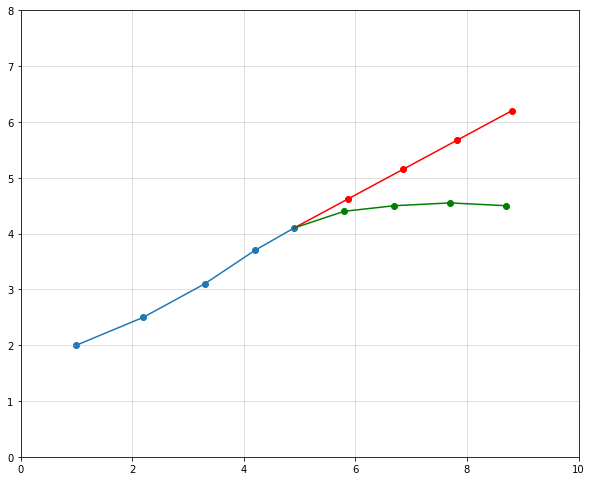

In [54]:
plot_traj_base()

x = [1, 2.2, 3.3, 4.2, 4.9]
y = [2, 2.5, 3.1, 3.7, 4.1]



x_vel = [x[i] - x[i-1] for i in range(1, len(x))]
y_vel = [y[i] - y[i-1] for i in range(1, len(y))]

x_pred = [x[-1] + np.mean(x_vel)*i for i in range(len(x))]
y_pred = [y[-1] + np.mean(y_vel)*i for i in range(len(x))]

x_gt = [x[-1], 5.8, 6.7, 7.7, 8.7]
y_gt = [y[-1], 4.4, 4.5, 4.55, 4.5]

plt.plot(x,y)
plt.scatter(x,y)

plt.plot(x_pred, y_pred, color='red')
plt.scatter(x_pred[1:], y_pred[1:], color='red')

plt.plot(x_gt, y_gt, color='green')
plt.scatter(x_gt[1:], y_gt[1:], color='green')